In [4]:
import pandas as pd
import numpy as np 
from sklearn.datasets import load_iris

In [27]:
dataset= load_iris()

In [28]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

### Independent Features and Dependent Features

In [29]:
df=pd.DataFrame(data=dataset.data,columns=[dataset.feature_names])

In [30]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [31]:
df['target']=dataset.target

In [53]:
df_copy=df[(dataset['target']!=2)]


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   (sepal length (cm),)  150 non-null    float64
 1   (sepal width (cm),)   150 non-null    float64
 2   (petal length (cm),)  150 non-null    float64
 3   (petal width (cm),)   150 non-null    float64
 4   (target,)             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [44]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [54]:
X=df_copy.iloc[:,:-1]
y=df_copy.iloc[:,-1]

In [57]:
(X.shape,y.shape)

((100, 4), (100,))

In [59]:
from sklearn.linear_model import LogisticRegression
import seaborn as sns

<AxesSubplot: xlabel='None', ylabel='None'>

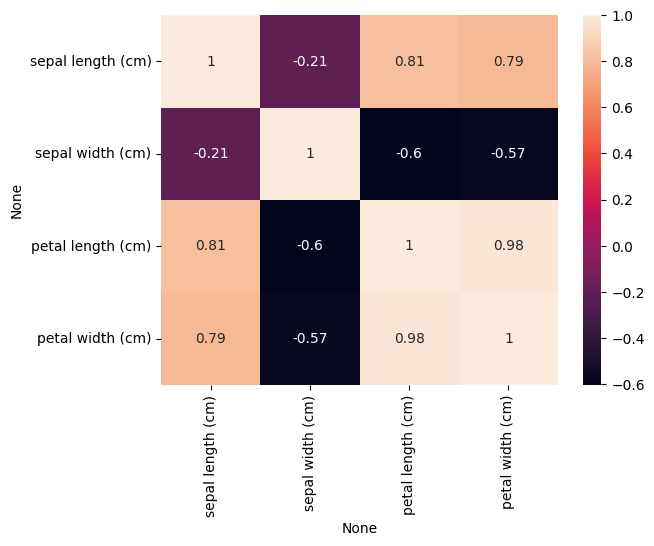

In [62]:
sns.heatmap(X.corr(),annot=True)

<AxesSubplot: >

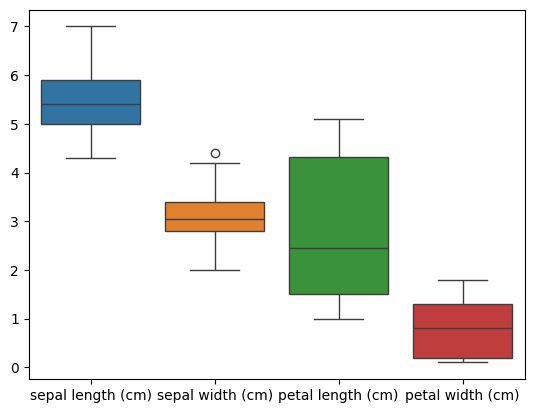

In [63]:
sns.boxplot(X)

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [65]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=43,test_size=0.20)

In [67]:
X_train.shape,y_train.shape

((80, 4), (80,))

In [69]:
scaler=StandardScaler()

In [71]:
X_train_std=scaler.fit_transform(X_train)
X_test_std=scaler.fit_transform(X_test)

<AxesSubplot: >

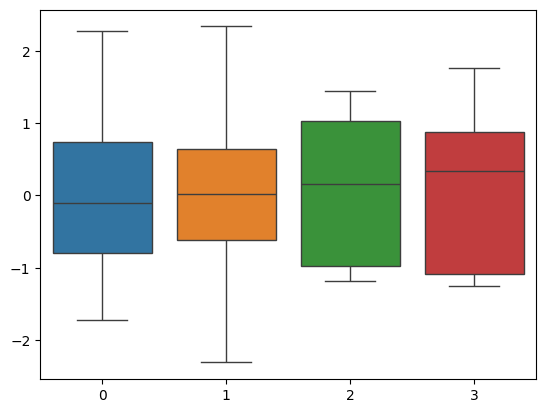

In [73]:
sns.boxplot(X_train_std)

In [74]:
logistic_model=LogisticRegression()

In [75]:
logistic_model.fit(X_train_std,y_train)

LogisticRegression()

In [82]:

y_pred=logistic_model.predict(X_test_std)
y_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1])

### Model Metrics

In [83]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [81]:
classification_report(y_test,y_pred).split('\n')

['              precision    recall  f1-score   support',
 '',
 '           0       1.00      1.00      1.00        11',
 '           1       1.00      1.00      1.00         9',
 '',
 '    accuracy                           1.00        20',
 '   macro avg       1.00      1.00      1.00        20',
 'weighted avg       1.00      1.00      1.00        20',
 '']

In [84]:
confusion_matrix(y_test,y_pred)

array([[11,  0],
       [ 0,  9]], dtype=int64)

<AxesSubplot: >

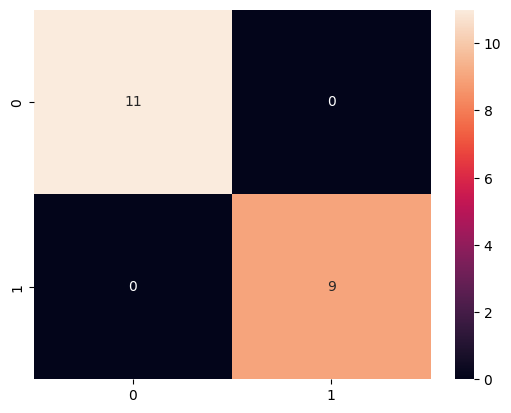

In [86]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [87]:
accuracy_score(y_test,y_pred)

1.0

## HyperParameter Tuning

In [88]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [92]:
parameters={"penalty":('l1','l2','elasticnet',None) ,'C':[1,10]}

In [93]:
clf=GridSearchCV(estimator=logistic_model,param_grid=parameters,cv=5)

In [94]:
# train data to vlidtion data or cross validation
clf.fit(X_train_std,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 10],
                         'penalty': ('l1', 'l2', 'elasticnet', None)})

In [95]:
clf.best_params_ # these are the default and best params when we trained lucklily but if here we get another params we need to train the model with these params

{'C': 1, 'penalty': 'l2'}